In [1]:
import os
path = os.path.abspath(os.getcwd())

In [2]:
%run -i common_functions

# I/ Data Formatting

In [3]:
# FILES

all_data_files = [
     'moduntu_HP_desktop_trace_idle_22.12.14_6h',
     'moduntu_HP_desktop_trace_idle_22.12.15_20h',
     'moduntu_HP_desktop_trace_no-wifi_22.12.16_19h',
     'moduntu_HP_server_trace_idle_22.12.21_16h',
     'moduntu_HP_server_trace_no-wifi_22.12.20_16h',
     'moduntu_RPi_server32_trace_no-peri_23.01.19_17h',
     'moduntu_RPi_server32_trace_no-wifi_23.01.18_14h',
     'moduntu_VM_desktop_trace_idle_22.11.15_1h',
     'moduntu_VM_desktop_trace_idle_22.12.13_12h',
     'moduntu_VM_desktop_trace_no-wifi_23.01.18_14h',
     'moduntu_VM_server_trace_idle_22.12.13_9h',
     'moduntu_VM_server_trace_no-wifi_23.01.18_14h']

data_files = [  
     'moduntu_HP_desktop_trace_no-wifi_22.12.16_19h',
     'moduntu_HP_server_trace_no-wifi_22.12.20_16h',
     'moduntu_RPi_server32_trace_no-peri_23.01.19_17h',
     'moduntu_VM_desktop_trace_no-wifi_23.01.18_14h',
     'moduntu_VM_server_trace_no-wifi_23.01.18_14h'
]

file = data_files[0]

## A. Text to CSV

In [4]:
def txtdmp_to_csv(filename):
    with open("data/" + filename + ".txt", "r") as textfile:
        textdump = textfile.read().splitlines()
        
    csvfile = open("csv/" + filename + ".csv", "w")
    csvfile.write(','.join(["count", "input1", "input2", "source_id", "idle"]))
    csvfile.write('\n')

    count = 0
    for line in textdump: 
        splitline = line.replace('@','').replace(',','').split(' ')
        values, start, idle = [], False, False

        for i in splitline: 
            # extract fast_mix values
            if i == "fast_mix:":
                start = True
                count += 1
                values.append(str(count))
            elif start:
                values.append(i)

            # Check for idle
            if i == "<idle>-0":
                idle = True

        if values != []:
            values.append(str(idle))
            csvfile.write(','.join(values))
            csvfile.write('\n')

    csvfile.close()

## B. Data Import

In [5]:
# Show stats for 'idle' column.
data_path = path + "\\csv\\" + file + ".csv"
data = pd.read_csv(data_path)

print(file)
for col in ["idle"]:
    get_stats(data, col)

moduntu_HP_desktop_trace_no-wifi_22.12.16_19h
    Stats for idle :
        True		 4218471		 99%
        False		 23268		 1%



In [6]:
data.head(3)

,count,input1,input2,source_id,idle
0,1,30342779072,18446744071864555537,0,True
1,2,30351947516,18446744071864555537,0,True
2,3,30361129622,18446744071864555537,0,True


# II/ Analysis of the Instruction Pointer

## A. Undifferenced Variable

### 1) Direct Plotting

Plot of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739
	 log = False


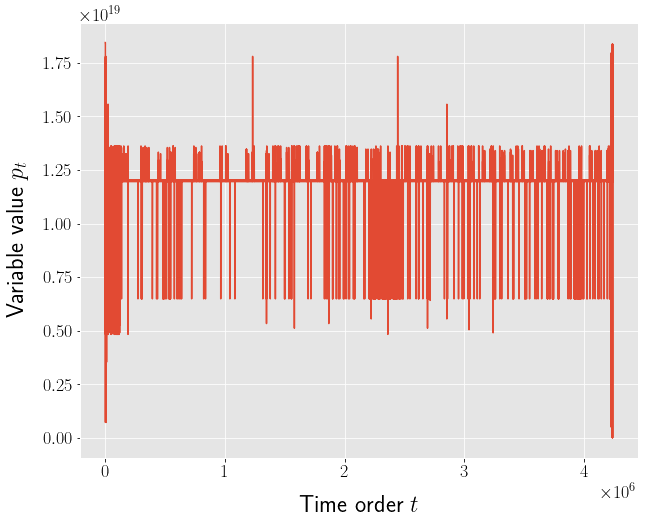

In [7]:
data_plot(file, 'input2', log=False, ylabel=r'Variable value $p_t$')

Plot of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 421847, 421847
	 # of elements: 3374777
	 log = True


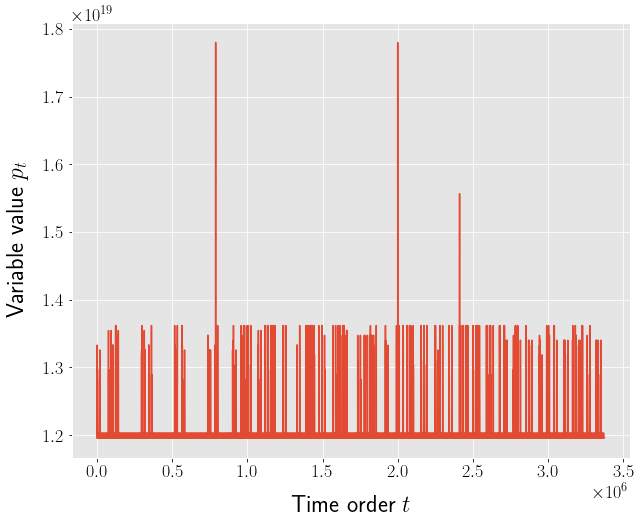

In [8]:
data_plot(file, 'input2', selection = [('idle', True)], crop = (0.1, 0.1), log = True,
          ylabel=r'Variable value $p_t$')

### 2) Histogram

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739
	 # of bins: 2059
	 log = True


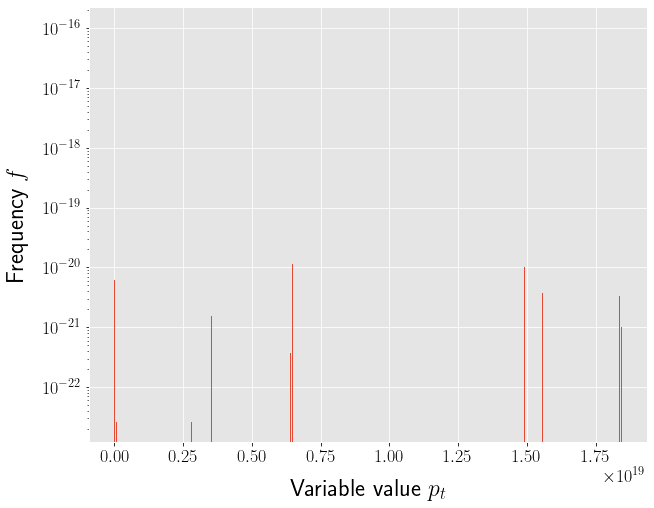

In [9]:
data_hist(file, 'input2', log=True, xlabel=r'Variable value $p_t$')

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 421847, 421847
	 # of elements: 3374777
	 # of bins: 1837
	 log = True


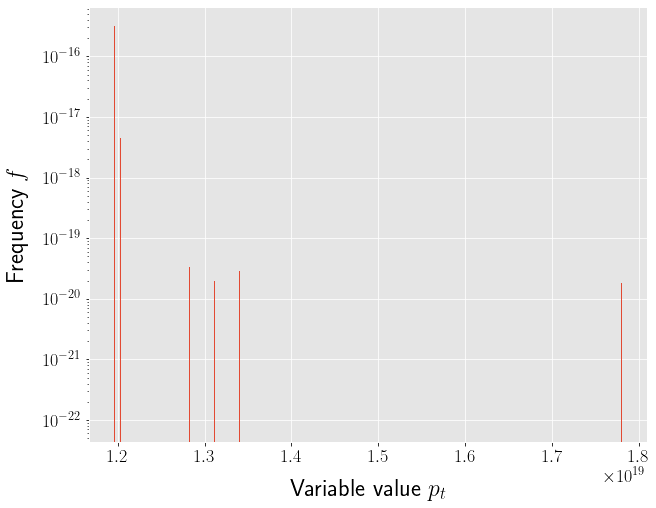

In [10]:
data_hist(file, 'input2', selection = [('idle', True)], crop = (0.1, 0.1), log = True,
          xlabel=r'Variable value $p_t$')

### 3) Correlogram

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


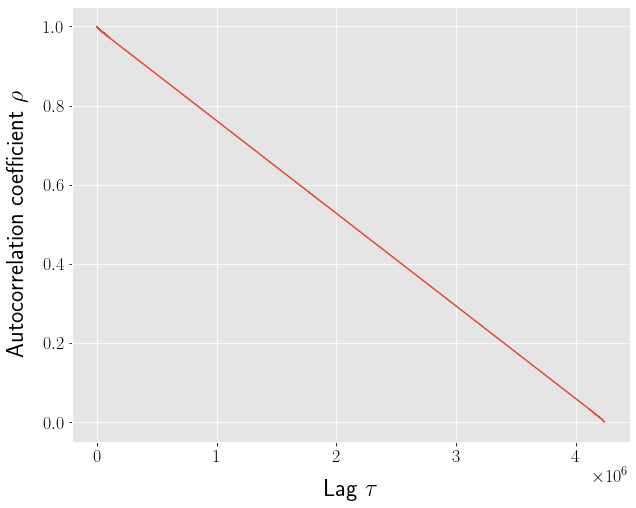

In [11]:
data_autocorr(file, 'input2', mode='fft', diff_order=0)

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


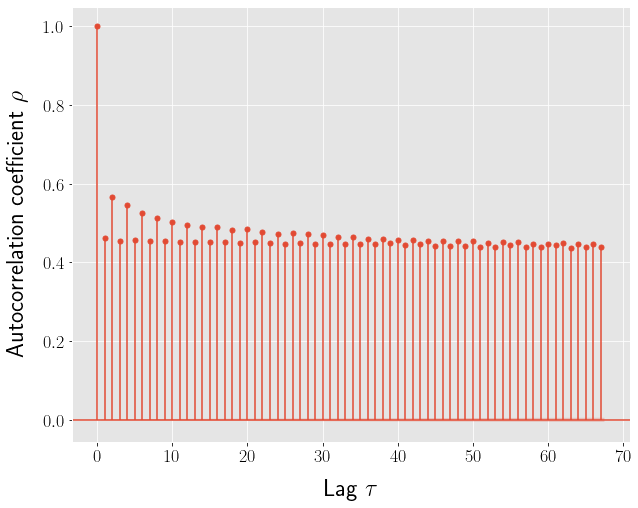

In [12]:
data_autocorr(file, 'input2', mode='acf', diff_order=0)

## B. First-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739
	 # of bins: 2059
	 log = True


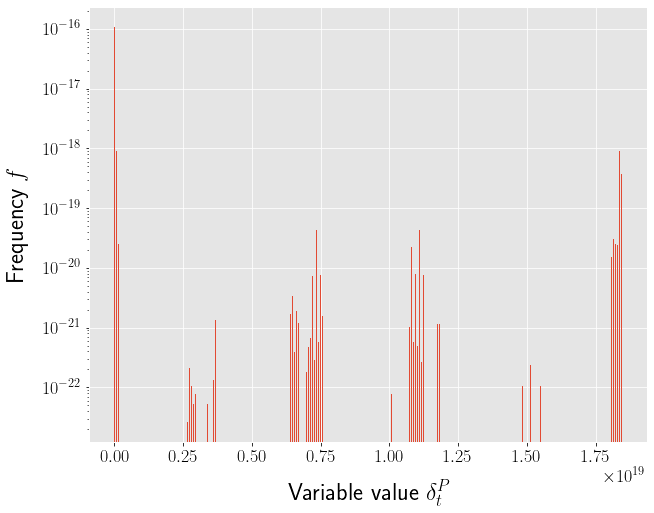

In [13]:
data_hist(file, 'input2', diff_order=1, log=True, xlabel=r'Variable value $\delta^P_t$')

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 1
	 selection: [('idle', True)]
	 crop values: 421847, 421847
	 # of elements: 3374777
	 # of bins: 1837
	 log = True


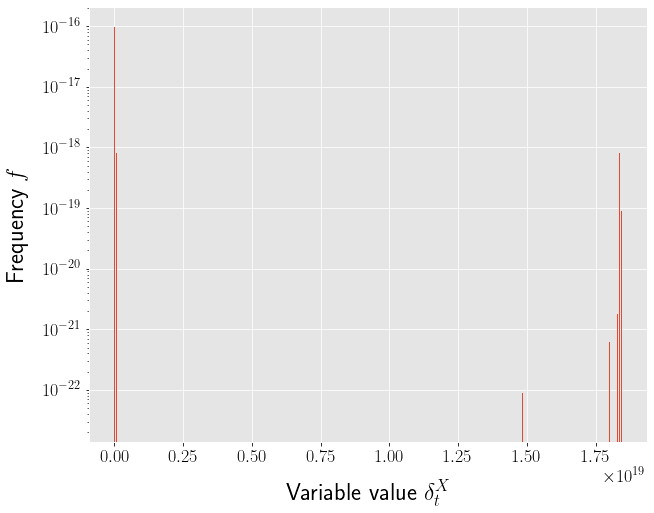

In [14]:
data_hist(file, 'input2', diff_order=1, selection=[('idle', True)], crop=(0.1, 0.1), log=True, 
         xlabel=r'Variable value $\delta^X_t$')

### 2) Correlogram

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


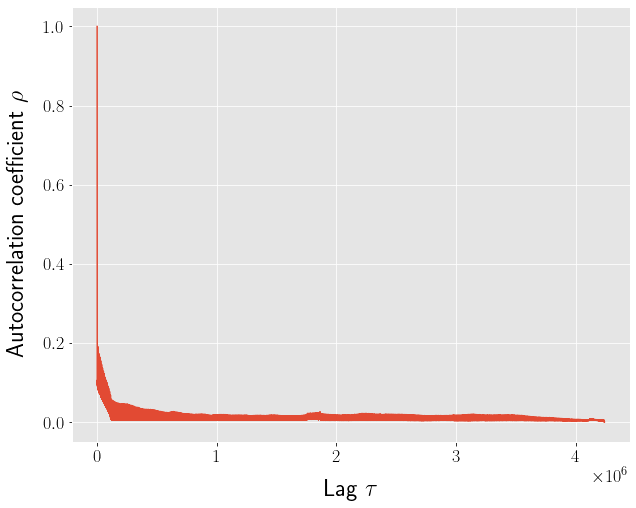

In [15]:
data_autocorr(file, 'input2', mode='fft', diff_order=1)

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


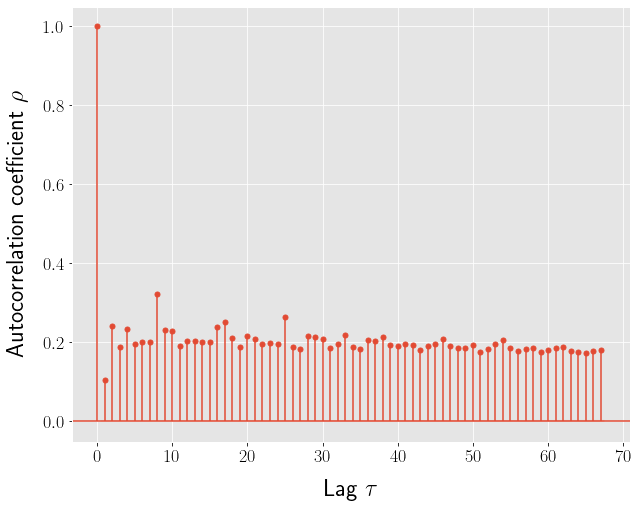

In [16]:
data_autocorr(file, 'input2', mode='acf', diff_order=1)

## C. Second-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739
	 # of bins: 2059
	 log = True


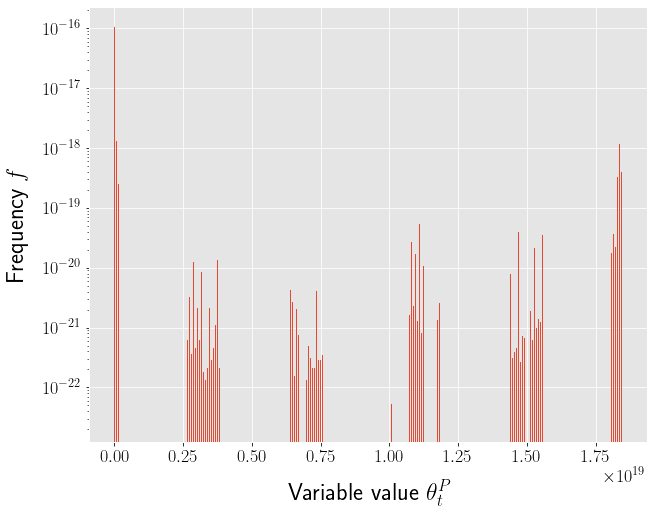

In [17]:
data_hist(file, 'input2', diff_order=2, log=True, xlabel=r'Variable value $\theta^P_t$')

Histogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 2
	 selection: [('idle', True)]
	 crop values: 421847, 421847
	 # of elements: 3374777
	 # of bins: 1837
	 log = True


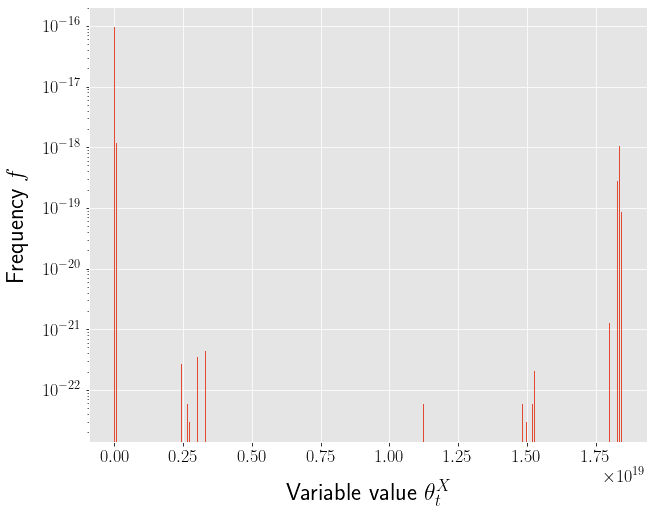

In [18]:
data_hist(file, 'input2', diff_order=2, selection=[('idle', True)], crop=(0.1, 0.1), log=True,
         xlabel=r'Variable value $\theta^X_t$')

### 2) Autocorrelation

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


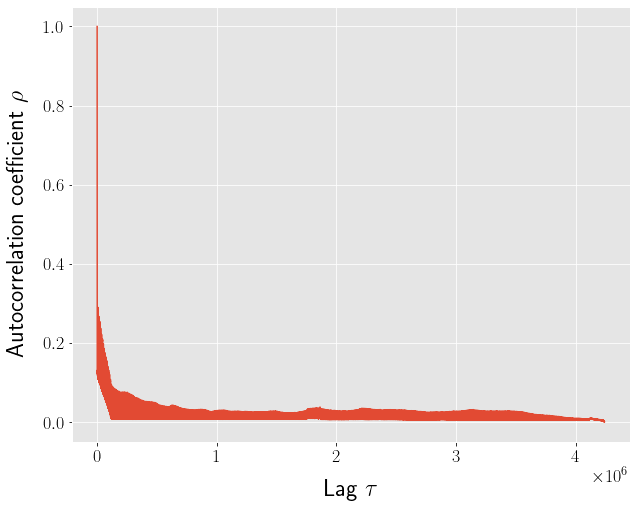

In [19]:
data_autocorr(file, 'input2', mode='fft', diff_order=2)

Correlogram of moduntu_HP_desktop_trace_no-wifi_22.12.16_19h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 4241739


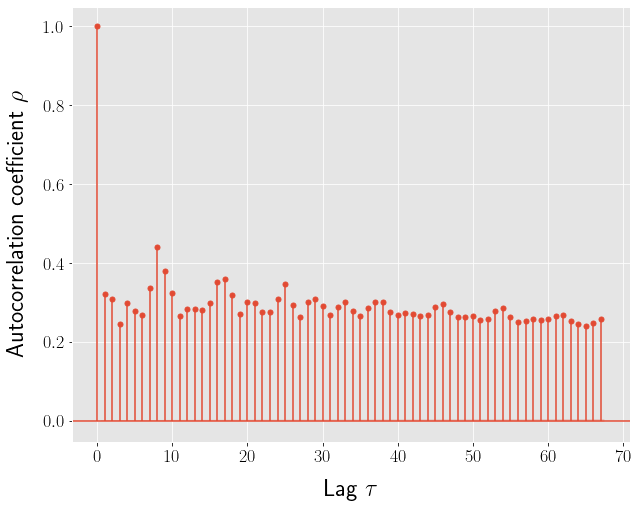

In [20]:
data_autocorr(file, 'input2', mode='acf', diff_order=2)

### 3) Model

In [21]:
data_freq(file, 'input2', diff_order=1, selection=[('idle', True)], crop=(0.3, 0.1)).head()

,Unique Value,Count,Ratio,Percentage
0,0,2483684,0.981273,98.127323
1,72057594037927936,19610,0.007748,0.774767
2,18374686479671623680,19567,0.007731,0.773068
3,7555111,2347,0.000927,0.092727
4,18446744073701996505,2263,0.000894,0.089408


In [22]:
data_freq(file, 'input2', diff_order=2, selection=[('idle', True)], crop=(0.3, 0.1)).head()

,Unique Value,Count,Ratio,Percentage
0,0,2452838,0.969086,96.908636
1,72057594037927936,29012,0.011462,1.146229
2,18374686479671623680,25141,0.009933,0.993290
3,18302628885633695744,6753,0.002668,0.266803
4,144115188075855872,4936,0.001950,0.195015


In [23]:
conditional_data_freq(file, 'input2', diff_order=2, selection=[('idle', True)], crop=(0.3, 0.1), 
                      output="ip-conditional_freqs")

[[0.0,
  [(0, 0.993364010735324),
   (3, 8.15382351130548e-07),
   (1655, 4.07691175565274e-07),
   (1662, 4.07691175565274e-07),
   (1666, 4.892294106783288e-06),
   (1684, 4.07691175565274e-07),
   (9223, 6.523058809044384e-06),
   (9281, 4.07691175565274e-07),
   (9292, 4.07691175565274e-07),
   (3421154, 4.07691175565274e-07),
   (3421155, 8.15382351130548e-07),
   (3460499, 4.07691175565274e-07),
   (3460588, 8.15382351130548e-07),
   (3467295, 4.07691175565274e-07),
   (3497136, 4.07691175565274e-07),
   (3497139, 8.15382351130548e-07),
   (3497407, 1.5084573495915138e-05),
   (3499383, 4.892294106783288e-06),
   (7555111, 0.0007795055276808039),
   (9632441, 4.07691175565274e-07),
   (10154681, 4.07691175565274e-07),
   (72057594027548105, 4.07691175565274e-07),
   (72057594027727042, 4.07691175565274e-07),
   (72057594027759699, 4.07691175565274e-07),
   (72057594037927936, 0.004724733033625961),
   (72057594041427319, 4.07691175565274e-07),
   (72057594045483047, 3.91383528542